# Tutorial 4: Compare the predicted sample-cfRNA between the disease group and the normal group

CellFreeGMF employs a single-cell reference dataset to computationally association matrices that quantify relationships between pathological/healthy samples and specific cell types

In [14]:
rm(list = ls())

print(R.home())
print(.libPaths())

[1] "/home/zhangwenxiang/anaconda3/envs/CellFreeGMF/lib/R"
[1] "/home/zhangwenxiang/anaconda3/envs/CellFreeGMF/lib/R/library"


## Preparation

In [15]:
library(reticulate)
library(Seurat)
library(dplyr)
library(future)
library(ggplot2)
library(dplyr)
library(scales)
library(ggpubr)

Setting python environment

In [16]:
use_python("/home/zhangwenxiang/anaconda3/envs/CellFreeGMF/bin/python", required = TRUE)

py_config()

python:         /home/zhangwenxiang/anaconda3/envs/CellFreeGMF/bin/python
libpython:      /home/zhangwenxiang/anaconda3/envs/CellFreeGMF/lib/libpython3.10.so
pythonhome:     /home/zhangwenxiang/anaconda3/envs/CellFreeGMF:/home/zhangwenxiang/anaconda3/envs/CellFreeGMF
version:        3.10.16 | packaged by conda-forge | (main, Apr  8 2025, 20:53:32) [GCC 13.3.0]
numpy:          /home/zhangwenxiang/anaconda3/envs/CellFreeGMF/lib/python3.10/site-packages/numpy
numpy_version:  2.2.6

NOTE: Python version was forced by use_python() function

## Hyperparameter Configuration

In [17]:
setwd('/home/zhangwenxiang/workspace/python/cfRNA/v16')
disease_name = 'PDAC'

## Load predicted data

In [18]:
np <- import("numpy")

Decon_sampletype_disease_cfRNAtype_Target_gene <- np$load(paste("./save_data/", disease_name, "/Decon_sampletype_disease_cfRNAtype_Target_gene.npz", sep = ""), allow_pickle = TRUE)
Decon_sampletype_normal_cfRNAtype_Target_gene <- np$load(paste("./save_data/", disease_name, "/Decon_sampletype_normal_cfRNAtype_Target_gene.npz", sep = ""), allow_pickle = TRUE)

Normal_Target_decon_Result_sample_cfRNA <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['Result_sample_cfRNA'])
Normal_Target_decon_Result_sample_cell <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['Result_sample_cell'])
Normal_Target_decon_Result_cfRNA_cell <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['Result_cfRNA_cell'])
Normal_Target_decon_sample_name <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['sample_name'])
Normal_Target_decon_cfRNA_name <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['cfRNA_name'])
Normal_Target_decon_cell_name <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['cell_name_cell_ontology_class'])
Normal_Target_decon_cell_id <- py_to_r(Decon_sampletype_normal_cfRNAtype_Target_gene$f['cell_id'])
Normal_Target_cell_meta <- data.frame(cell_name = Normal_Target_decon_cell_name,
                                      cell_id = Normal_Target_decon_cell_id)

Disease_Target_decon_Result_sample_cfRNA <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['Result_sample_cfRNA'])
Disease_Target_decon_Result_sample_cell <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['Result_sample_cell'])
Disease_Target_decon_Result_cfRNA_cell <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['Result_cfRNA_cell'])
Disease_Target_decon_sample_name <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['sample_name'])
Disease_Target_decon_cfRNA_name <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['cfRNA_name'])
Disease_Target_decon_cell_name <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['cell_name_cell_ontology_class'])
Disease_Target_decon_cell_id <- py_to_r(Decon_sampletype_disease_cfRNAtype_Target_gene$f['cell_id'])
Disease_Target_cell_meta <- data.frame(cell_name = Disease_Target_decon_cell_name,
                                      cell_id = Disease_Target_decon_cell_id)

Extracting sample-cell matrix

In [19]:
combined_mat <- data.frame(rbind(Normal_Target_decon_Result_sample_cell, 
                                 Disease_Target_decon_Result_sample_cell))
rownames(combined_mat) <- c(paste(Normal_Target_decon_sample_name,'_0', sep=""), 
                            paste(Disease_Target_decon_sample_name, '_1', sep = ""))
colnames(combined_mat) <- c(Disease_Target_decon_cell_id)

sample_cell <- as.matrix(combined_mat) %*% as.matrix(table(Normal_Target_decon_cell_id, Disease_Target_decon_cell_name))
disease_sample_cell <- sample_cell[1:length(Normal_Target_decon_sample_name),]
normal_sample_cell <- sample_cell[(length(Normal_Target_decon_sample_name) + 1):length(Disease_Target_decon_sample_name), ]

In [20]:
# 计算整体占比情况
prop.table(colSums(disease_sample_cell))
prop.table(colSums(normal_sample_cell))


b cell         endothelial cell               fibroblast 
            0.0109854215             0.1544861419             0.0032428318 
               mast cell             myeloid cell                  nk cell 
            0.0042480811             0.1387380458             0.0034694821 
  pancreatic acinar cell    pancreatic alpha cell     pancreatic beta cell 
            0.4103823271             0.0050139383             0.0067531675 
   pancreatic delta cell   pancreatic ductal cell       pancreatic pp cell 
            0.0007847294             0.1813483821             0.0052466621 
pancreatic stellate cell              plasma cell                   t cell 
            0.0285968254             0.0045158637             0.0421881003

b cell         endothelial cell               fibroblast 
            0.0108656142             0.1549791961             0.0030953801 
               mast cell             myeloid cell                  nk cell 
            0.0042667467             0.1387226083             0.0035013669 
  pancreatic acinar cell    pancreatic alpha cell     pancreatic beta cell 
            0.4080760903             0.0050383622             0.0067000671 
   pancreatic delta cell   pancreatic ductal cell       pancreatic pp cell 
            0.0007541003             0.1826963510             0.0052338069 
pancreatic stellate cell              plasma cell                   t cell 
            0.0288521230             0.0045527481             0.0426654388

Calculate p value

In [24]:
# 计算不同类型细胞p值
label <- c(rep("Normal", length(Normal_Target_decon_sample_name)),
           rep("Tumor", length(Disease_Target_decon_sample_name)))

p_values_wilcox <- sapply(1:ncol(sample_cell), function(i) {
  wilcox.test(sample_cell[, i] ~ label)$p.value
})
names(p_values_wilcox) <- colnames(sample_cell)
p_values_wilcox <- p_values_wilcox[p_values_wilcox < 0.05]
p_values_wilcox

endothelial cell             myeloid cell   pancreatic acinar cell 
             0.003418754              0.007552919              0.004049733 
   pancreatic alpha cell   pancreatic ductal cell pancreatic stellate cell 
             0.014451215              0.003377305              0.041521423 
                  t cell 
             0.006044487

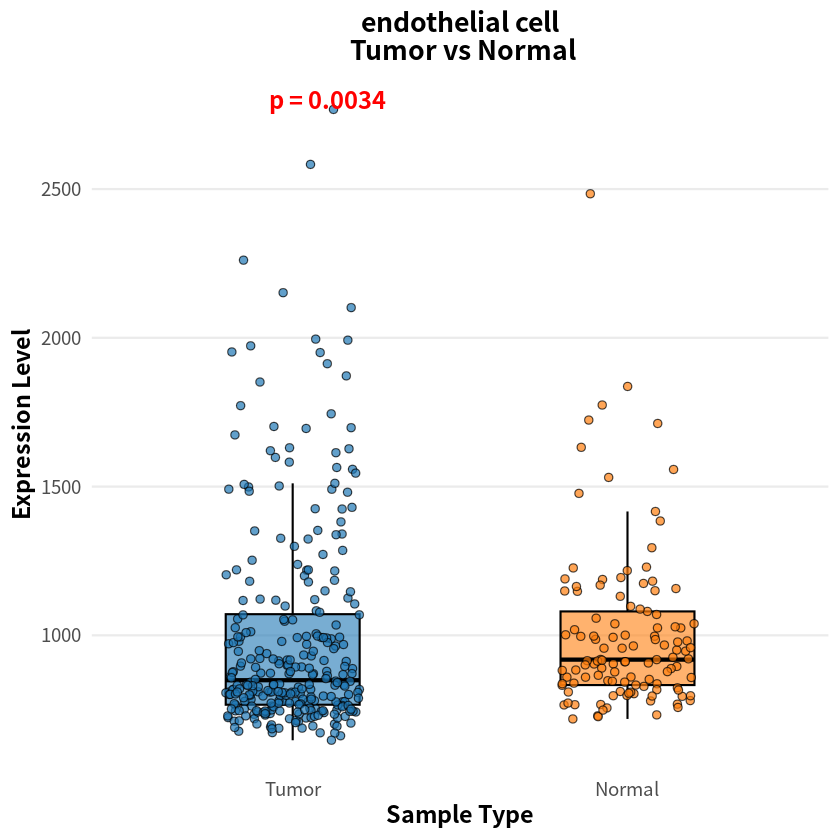

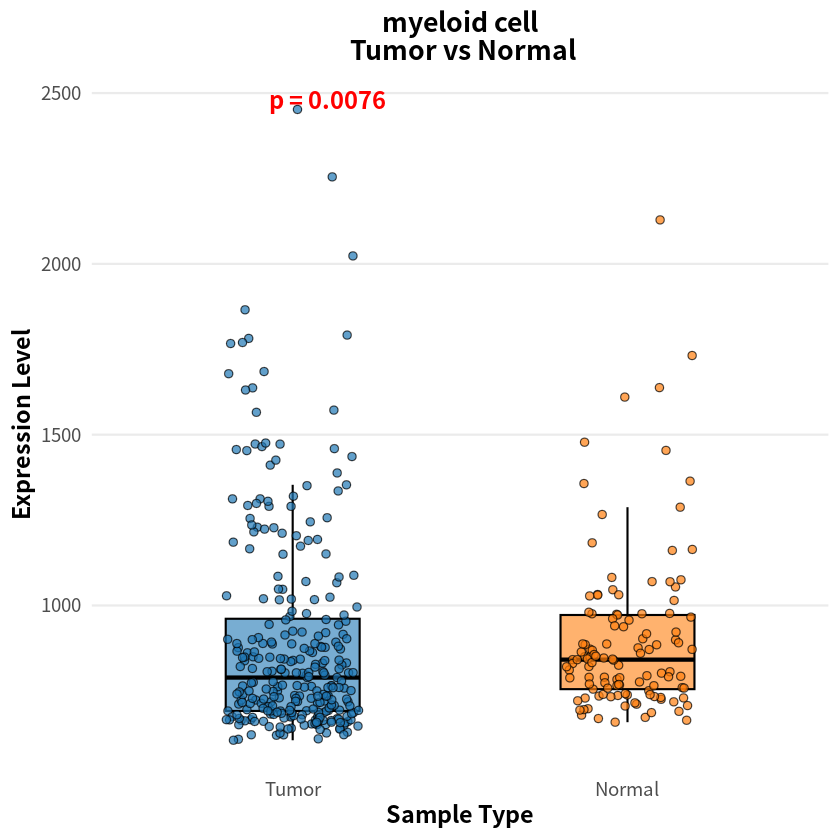

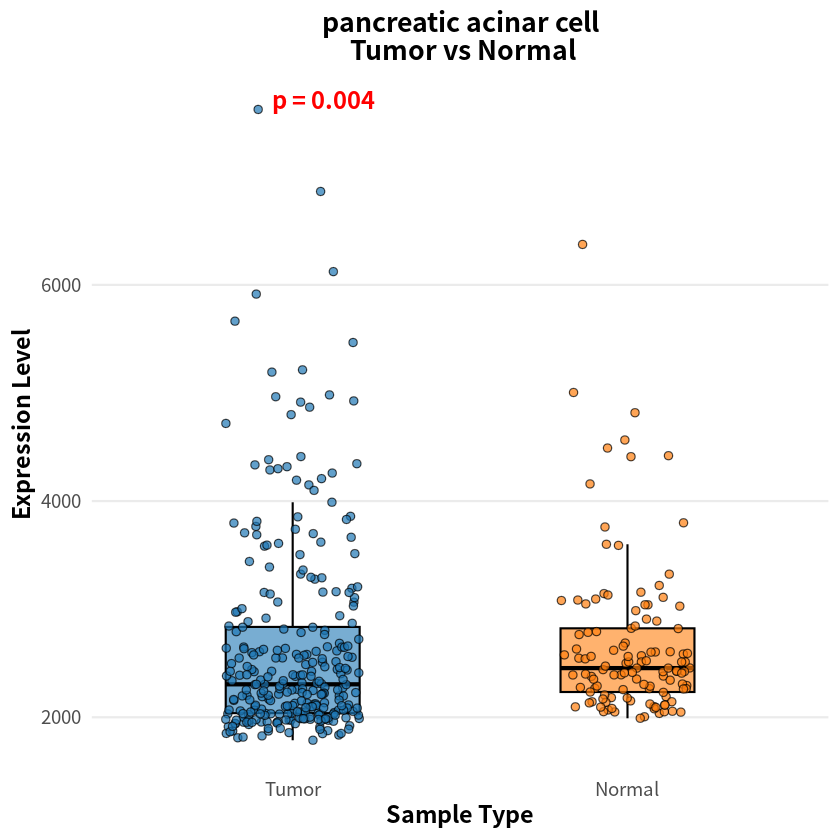

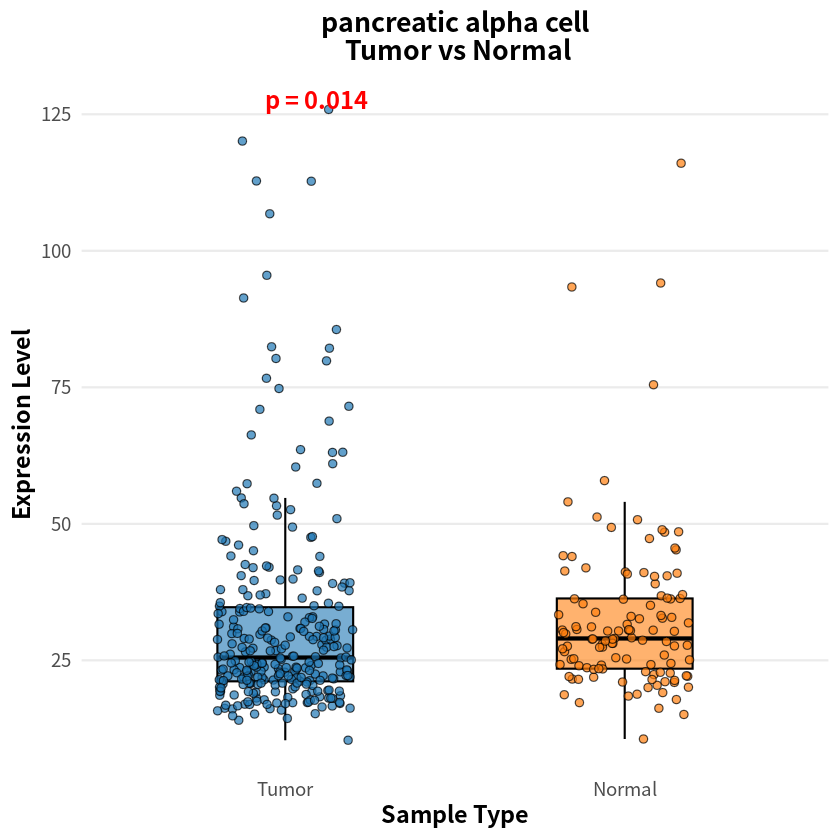

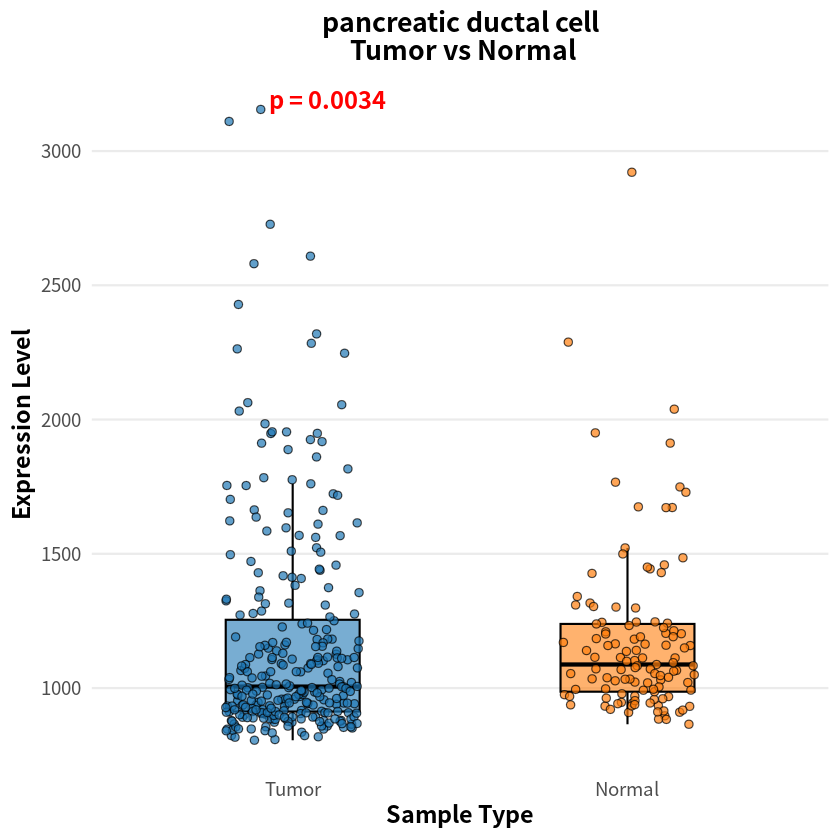

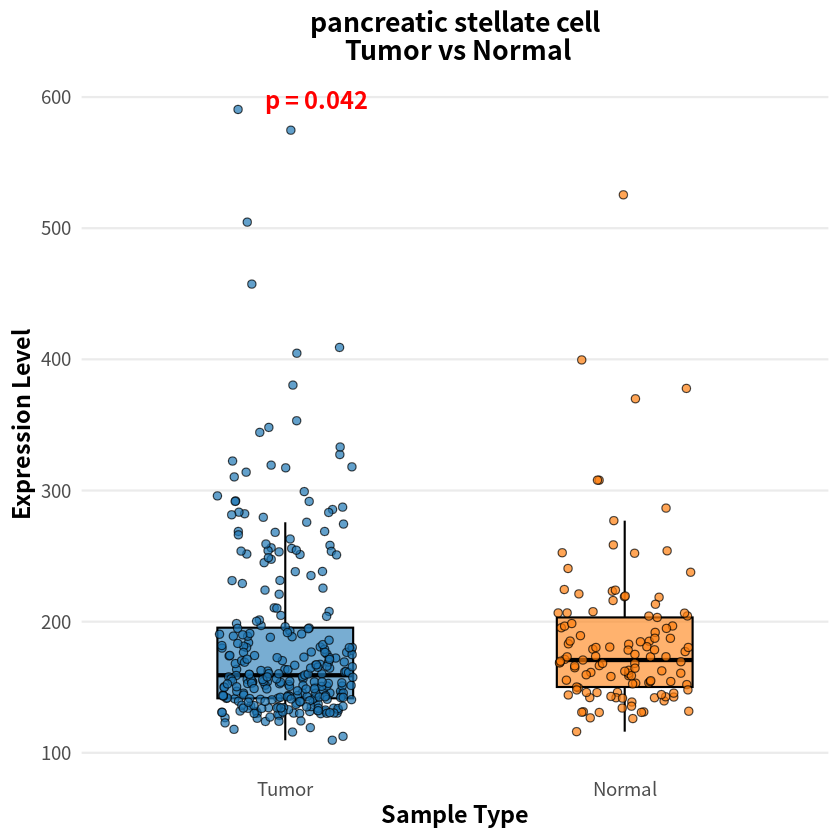

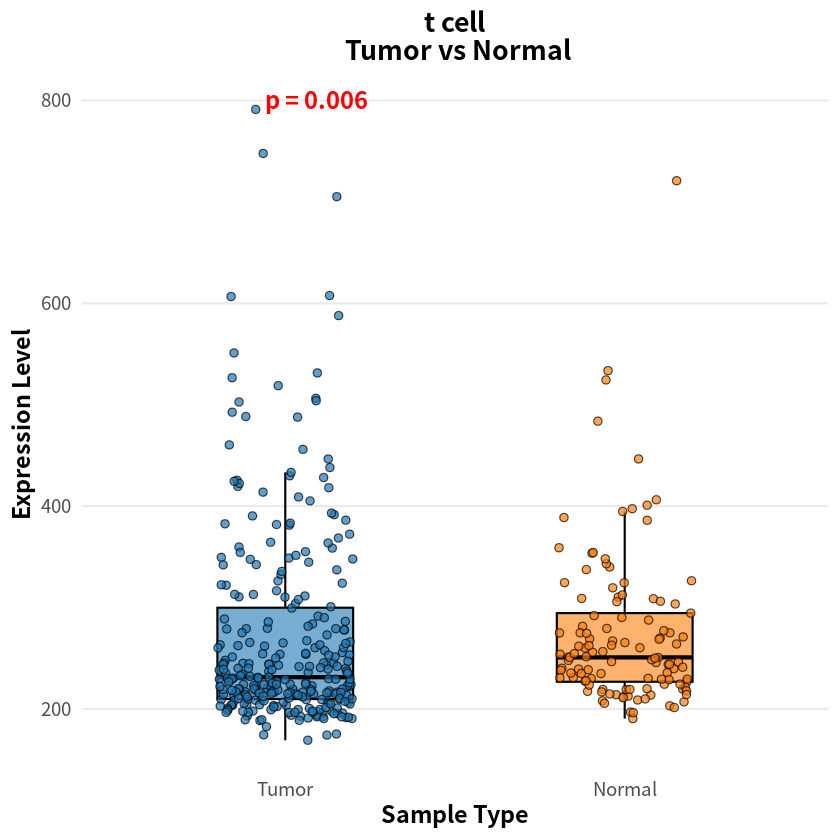

In [27]:
for(cell_name in names(p_values_wilcox)){
  # 绘制箱线图
  expr_df <- as.data.frame(sample_cell[, cell_name])
  colnames(expr_df) <- 'Cell1'
  
  # 合并为一个 data.frame
  cell1_df <- data.frame(
    Expression = expr_df$Cell1,
    SampleType = factor(label, levels = c("Tumor", "Normal"))
  )
  
  # 绘图
  p <- ggplot(cell1_df, aes(x = SampleType, y = Expression, fill = SampleType)) + 
    geom_boxplot(width = 0.4, alpha = 0.6, outlier.shape = NA, color = "black", lwd = 0.6) +
    geom_jitter(width = 0.2, size = 2, alpha = 0.7, shape = 21, color = "black") +
    stat_compare_means(
      method = "wilcox.test",
      label = "p.format",
      label.y.npc = "top",
      size = 5,
      fontface = "bold",
      color = "red"
    ) +
    scale_fill_manual(values = c("Tumor" = "#1f77b4", "Normal" = "#ff7f0e")) +
    theme_minimal(base_size = 14) +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
      axis.title = element_text(face = "bold"),
      legend.position = "none",  # 如果分类已经在 x 轴标签中显示，可以隐藏图例
      panel.grid.major.x = element_blank(),
      panel.grid.minor = element_blank()
    ) +
    labs(
      title = paste(cell_name, "\n Tumor vs Normal", sep = ""),
      x = "Sample Type",
      y = "Expression Level"
    )
  print(p)
}
